1.scikit-learn:sklearn機器學習
2.pandas:表格處理
3.numpy:多維陣列函式庫
4.opencv:影像處理/AI函式庫
5.pillow(PLO):影像處理
6.matplotlib:視覺化基礎函式庫
7.seaborn: 視覺化進階函式庫

In [2]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


資料量需求:
1.機器學習:1k-1w以上
2.深度學習:1w-10w以上

題目難度<一> 資料需求
1.簡單:少點OK
2.難:多一點

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
x=pd.DataFrame(iris['data'],columns=iris['feature_names'])
y=iris['target']
#順便複習
total=x[:]
total['ans']=iris['target']
total.to_csv('iris.csv',index=False,encoding='utf-8')

<ipython-input-11-c91ac59e6581>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['ans']=iris['target']


先把你的資料分成兩分:一份訓練/一份驗證
進到sklearn以前:pd.DataFrame
進到sklearn以後(train_test_split):np.array後(train_test_split):np.array

In [16]:
import numpy as np #数组来存储数据
from sklearn.model_selection import train_test_split
#从sklearn.model_selection模块中导入train_test_split函数，用于将数据集划分为训练集和测试集。
train_test_split([1,2,3,4],[5,6,7,8],[9,10,11,12],test_size=1)

x_np=np.array(x)#訓練集
y_np=np.array(y)#測試集

x_train,x_test,y_train,y_test=train_test_split(x_np,y_np,test_size=0.1)#表表示将10%的数据划分为测试集，90%的数据划分为训练集。
print(x_train.shape)#分别输出训练集和测试集的特征数据的形状
print(x_test.shape)
print(x_train.shape)#存储了相应的目标数据，但没有进行形状的输出
print(x_test.shape)

(135, 4)
(15, 4)
(135, 4)
(15, 4)


In [17]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)#把資料丟進去

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [45, 43, 47]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 90\nvalue = [0, 43, 47]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'x[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.044\nsamples = 44\nvalue = [0, 1, 43]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 

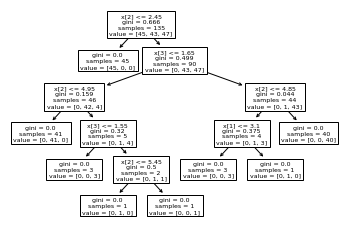

In [18]:
import matplotlib.pyplot as plt#用此把圖畫出來
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14)) #圖大小
plot_tree(clf)

(GINI):猜錯機率
決策樹:讓信心數提高最高最高 一>要把猜錯機率(GINI)降低
一顆決策樹會讓信心程度提高到100%(GINI=0)

$GINI=\sum p_i(1-pi)$

[Text(0.4, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [45, 43, 47]\nclass = virginica'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'petal width (cm) <= 1.65\ngini = 0.499\nsamples = 90\nvalue = [0, 43, 47]\nclass = virginica'),
 Text(0.2, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.25, 'petal length (cm) <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.5, 0.08333333333333

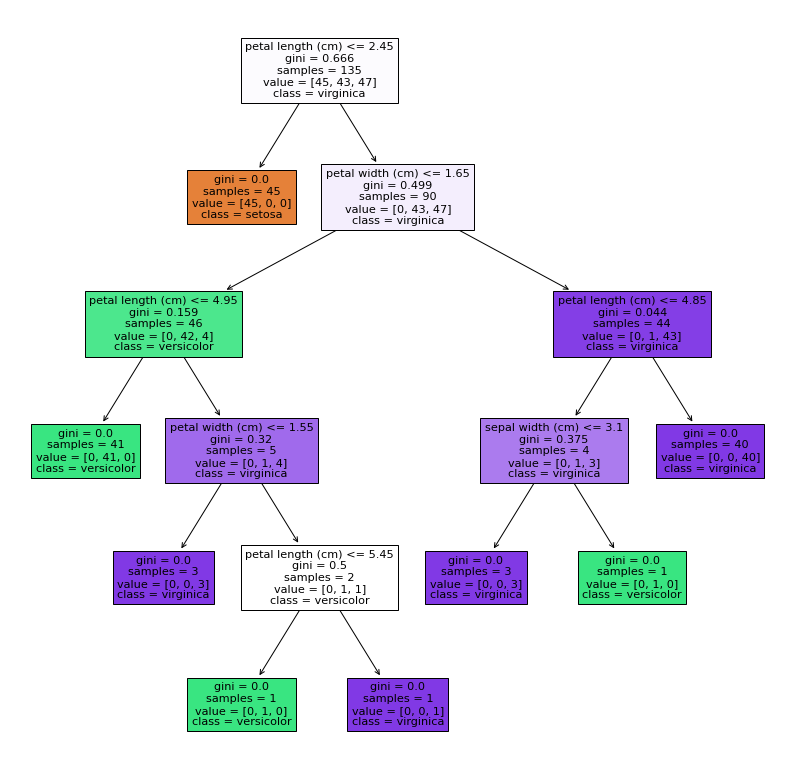

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, #训练好的决策树模型。
     feature_names=x.columns, #有要判斷True or False 的格子才會print 出 x.column (包含所有列标签的列表)
     class_names=iris["target_names"],
     filled=True)#上色